In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

In [2]:
# Pandas settings options
pd.set_option('max_colwidth', None)
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Pands reset for option Max_Rows
pd.reset_option('display.max_rows')

In [4]:
# Reading in CSV files to dataframes
path = '../Resources/'
economy_df = pd.read_csv(path + 'economy.csv', low_memory=False)
picks_df = pd.read_csv(path + 'picks.csv')
players_df = pd.read_csv(path + 'players.csv')
results_df = pd.read_csv(path + 'results.csv.zip')

In [5]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43234 entries, 0 to 43233
Data columns (total 99 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43234 non-null  object 
 1   match_id   43234 non-null  int64  
 2   event_id   43234 non-null  int64  
 3   team_1     43234 non-null  object 
 4   team_2     43234 non-null  object 
 5   best_of    43234 non-null  object 
 6   _map       43234 non-null  object 
 7   t1_start   43234 non-null  object 
 8   t2_start   43234 non-null  object 
 9   1_t1       43234 non-null  float64
 10  2_t1       43234 non-null  float64
 11  3_t1       43234 non-null  float64
 12  4_t1       43234 non-null  float64
 13  5_t1       43234 non-null  float64
 14  6_t1       43234 non-null  float64
 15  7_t1       43234 non-null  float64
 16  8_t1       43234 non-null  float64
 17  9_t1       43234 non-null  float64
 18  10_t1      43234 non-null  float64
 19  11_t1      43234 non-null  float64
 20  12_t1 

In [6]:
players_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383317 entries, 0 to 383316
Data columns (total 101 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   player_name       object 
 2   team              object 
 3   opponent          object 
 4   country           object 
 5   player_id         int64  
 6   match_id          int64  
 7   event_id          int64  
 8   event_name        object 
 9   best_of           int64  
 10  map_1             object 
 11  map_2             object 
 12  map_3             object 
 13  kills             int64  
 14  assists           int64  
 15  deaths            int64  
 16  hs                int64  
 17  flash_assists     float64
 18  kast              float64
 19  kddiff            int64  
 20  adr               float64
 21  fkdiff            int64  
 22  rating            float64
 23  m1_kills          int64  
 24  m1_assists        int64  
 25  m1_deaths         int64  
 26  m1_hs          

In [7]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          45773 non-null  object
 1   team_1        45773 non-null  object
 2   team_2        45773 non-null  object
 3   _map          45773 non-null  object
 4   result_1      45773 non-null  int64 
 5   result_2      45773 non-null  int64 
 6   map_winner    45773 non-null  int64 
 7   starting_ct   45773 non-null  int64 
 8   ct_1          45773 non-null  int64 
 9   t_2           45773 non-null  int64 
 10  t_1           45773 non-null  int64 
 11  ct_2          45773 non-null  int64 
 12  event_id      45773 non-null  int64 
 13  match_id      45773 non-null  int64 
 14  rank_1        45773 non-null  int64 
 15  rank_2        45773 non-null  int64 
 16  map_wins_1    45773 non-null  int64 
 17  map_wins_2    45773 non-null  int64 
 18  match_winner  45773 non-null  int64 
dtypes: i

In [8]:
results_df['team_1'].value_counts()

Astralis       540
Liquid         527
Virtus.pro     526
FaZe           514
TYLOO          510
              ... 
ex-Nitrious      1
OwmS             1
EnVision         1
ZEN              1
Rude             1
Name: team_1, Length: 1248, dtype: int64

In [9]:
results_df['team_2'].value_counts()

mousesports          481
Tricked              480
Liquid               477
Virtus.pro           474
G2                   471
                    ... 
Xtreme Lungiz          1
Living Like Larry      1
GD                     1
dAT                    1
CG                     1
Name: team_2, Length: 1408, dtype: int64

In [10]:
# Total number of matches played by each individual team
team_match_counts = results_df['team_1'].append(results_df.loc[results_df['team_1'] != results_df['team_2'], 'team_2']).value_counts()
# Finds total matches played by teams with greater than 400 matches
sum(team_match_counts[team_match_counts > 300])

50236

In [11]:
over400 = team_match_counts[team_match_counts > 400]
teamName_over400 = over400.index.values.tolist()

In [12]:
picks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            16035 non-null  object
 1   team_1          16035 non-null  object
 2   team_2          16035 non-null  object
 3   inverted_teams  16035 non-null  int64 
 4   match_id        16035 non-null  int64 
 5   event_id        16035 non-null  int64 
 6   best_of         16035 non-null  object
 7   system          16035 non-null  int64 
 8   t1_removed_1    16035 non-null  object
 9   t1_removed_2    16035 non-null  object
 10  t1_removed_3    16035 non-null  object
 11  t2_removed_1    16035 non-null  object
 12  t2_removed_2    16035 non-null  object
 13  t2_removed_3    16035 non-null  object
 14  t1_picked_1     16035 non-null  object
 15  t2_picked_1     16035 non-null  object
 16  left_over       16035 non-null  object
dtypes: int64(4), object(13)
memory usage: 2.1+ MB


In [13]:
# Converting Date(object) to date
results_df['date'] = pd.to_datetime(results_df['date'])
players_df['date'] = pd.to_datetime(players_df['date'])
economy_df['date'] = pd.to_datetime(economy_df['date'])
picks_df['date'] = pd.to_datetime(picks_df['date'])

In [14]:
results_df.columns

Index(['date', 'team_1', 'team_2', '_map', 'result_1', 'result_2',
       'map_winner', 'starting_ct', 'ct_1', 't_2', 't_1', 'ct_2', 'event_id',
       'match_id', 'rank_1', 'rank_2', 'map_wins_1', 'map_wins_2',
       'match_winner'],
      dtype='object')

In [15]:
# Joining Dataframes

economy_df

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,11_t1,12_t1,13_t1,14_t1,15_t1,16_t1,17_t1,18_t1,19_t1,20_t1,21_t1,22_t1,23_t1,24_t1,25_t1,26_t1,27_t1,28_t1,29_t1,30_t1,1_t2,2_t2,3_t2,4_t2,5_t2,6_t2,7_t2,8_t2,9_t2,10_t2,11_t2,12_t2,13_t2,14_t2,15_t2,16_t2,17_t2,18_t2,19_t2,20_t2,21_t2,22_t2,23_t2,24_t2,25_t2,26_t2,27_t2,28_t2,29_t2,30_t2,1_winner,2_winner,3_winner,4_winner,5_winner,6_winner,7_winner,8_winner,9_winner,10_winner,11_winner,12_winner,13_winner,14_winner,15_winner,16_winner,17_winner,18_winner,19_winner,20_winner,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,1100.0,22100.0,9350.0,25750.0,10400.0,24600.0,8150.0,26700.0,23400.0,4300.0,25900.0,11950.0,24850.0,21900.0,4150.0,10650.0,27300.0,27000.0,30950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.0,20250.0,24600.0,29300.0,30650.0,31450.0,32050.0,31450.0,32050.0,30950.0,29300.0,30200.0,31550.0,32350.0,33050.0,4250.0,20300.0,8250.0,1300.0,22200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,7400.0,23250.0,28500.0,31900.0,31700.0,18950.0,30200.0,28650.0,30350.0,30150.0,11100.0,23700.0,8550.0,26350.0,4050.0,9400.0,21900.0,12700.0,11300.0,3100.0,26250.0,21300.0,23950.0,27450.0,27550.0,28050.0,26250.0,26250.0,NaN,3500.0,18550.0,7300.0,1500.0,21800.0,12000.0,21050.0,24450.0,6850.0,26850.0,23100.0,25650.0,26800.0,26750.0,28250.0,4000.0,18850.0,15850.0,23000.0,26850.0,29100.0,26300.0,26850.0,19050.0,3500.0,26450.0,27450.0,27500.0,29050.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,14300.0,2000.0,24800.0,9000.0,23150.0,21850.0,23700.0,10450.0,26250.0,8800.0,24950.0,12100.0,24350.0,18250.0,4300.0,19400.0,8900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,21200.0,24150.0,27050.0,31350.0,30650.0,31050.0,28150.0,29650.0,30950.0,31550.0,32950.0,32250.0,31650.0,33350.0,4350.0,14300.0,22850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,18050.0,21000.0,25850.0,25000.0,25000.0,27250.0,26150.0,26300.0,27850.0,26750.0,27450.0,27850.0,18300.0,27850.0,4000.0,21100.0,9100.0,3100.0,22100.0,23350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.0,9300.0,2100.0,19300.0,27250.0,9850.0,24800.0,12200.0,27550.0,26100.0,7450.0,27650.0,24500.0,19100.0,18050.0,4150.0,15100.0,18450.0,23150.0,28150.0,27850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,10000.0,22000.0,24500.0,27550.0,29350.0,31950.0,31850.0,31750.0,32850.0,32150.0,31750.0,31850.0,33050.0,33150.0,4250.0,3000.0,21150.0,11750.0,28050.0,25900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,17950.0,9050.0,1000.0,22850.0,7500.0,24400.0,24700.0,9700.0,27150.0,21850.0,21900.0,8150.0,25200.0,20450.0,4300.0,19300.0,27400.0,31700.0,29650.0,12150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [16]:
cols_to_use = economy_df.columns.difference(results_df.columns)
cols_to_use

Index(['10_t1', '10_t2', '10_winner', '11_t1', '11_t2', '11_winner', '12_t1',
       '12_t2', '12_winner', '13_t1', '13_t2', '13_winner', '14_t1', '14_t2',
       '14_winner', '15_t1', '15_t2', '15_winner', '16_t1', '16_t2',
       '16_winner', '17_t1', '17_t2', '17_winner', '18_t1', '18_t2',
       '18_winner', '19_t1', '19_t2', '19_winner', '1_t1', '1_t2', '1_winner',
       '20_t1', '20_t2', '20_winner', '21_t1', '21_t2', '21_winner', '22_t1',
       '22_t2', '22_winner', '23_t1', '23_t2', '23_winner', '24_t1', '24_t2',
       '24_winner', '25_t1', '25_t2', '25_winner', '26_t1', '26_t2',
       '26_winner', '27_t1', '27_t2', '27_winner', '28_t1', '28_t2',
       '28_winner', '29_t1', '29_t2', '29_winner', '2_t1', '2_t2', '2_winner',
       '30_t1', '30_t2', '30_winner', '3_t1', '3_t2', '3_winner', '4_t1',
       '4_t2', '4_winner', '5_t1', '5_t2', '5_winner', '6_t1', '6_t2',
       '6_winner', '7_t1', '7_t2', '7_winner', '8_t1', '8_t2', '8_winner',
       '9_t1', '9_t2', '9_winner',

In [17]:
# Merging all Dataframes into one
new_df = pd.merge(results_df, economy_df, how='inner', left_on=['match_id', '_map'], right_on=['match_id', '_map'])
new_df

,date_x,team_1_x,team_2_x,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id_x,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner,date_y,event_id_y,team_1_y,team_2_y,best_of,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,11_t1,12_t1,13_t1,14_t1,15_t1,16_t1,17_t1,18_t1,19_t1,20_t1,21_t1,22_t1,23_t1,24_t1,25_t1,26_t1,27_t1,28_t1,29_t1,30_t1,1_t2,2_t2,3_t2,4_t2,5_t2,6_t2,7_t2,8_t2,9_t2,10_t2,11_t2,12_t2,13_t2,14_t2,15_t2,16_t2,17_t2,18_t2,19_t2,20_t2,21_t2,22_t2,23_t2,24_t2,25_t2,26_t2,27_t2,28_t2,29_t2,30_t2,1_winner,2_winner,3_winner,4_winner,5_winner,6_winner,7_winner,8_winner,9_winner,10_winner,11_winner,12_winner,13_winner,14_winner,15_winner,16_winner,17_winner,18_winner,19_winner,20_winner,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,Wings,Global,Dust2,16,13,1,1,7,8,9,5,5234,2339873,231,167,2,1,1,2020-03-01,5234,Wings,Global,3,ct,t,4250.0,18950.0,14350.0,25300.0,3250.0,7650.0,24250.0,22950.0,8350.0,27750.0,25200.0,23700.0,28250.0,30350.0,30750.0,3450.0,2000.0,15400.0,19000.0,7600.0,24900.0,26100.0,26350.0,19850.0,26750.0,27050.0,27050.0,27350.0,26100.0,NaN,4050.0,12500.0,21150.0,20650.0,23850.0,23350.0,27950.0,26650.0,21450.0,25550.0,26950.0,24900.0,16850.0,4500.0,24900.0,4200.0,19350.0,23350.0,21450.0,27950.0,29050.0,17350.0,1000.0,23900.0,7500.0,28900.0,25400.0,26600.0,16500.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN
1,2020-03-01,Incept,Rooster,Overpass,3,16,2,2,0,4,3,12,5152,2339748,219,124,3,16,2,2020-03-01,5152,Incept,Rooster,1,t,ct,4000.0,9400.0,3950.0,24150.0,18300.0,23550.0,20350.0,19450.0,22700.0,17950.0,18750.0,23200.0,25900.0,20350.0,27050.0,4350.0,11050.0,5400.0,22500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,18500.0,22550.0,26200.0,29750.0,30250.0,30350.0,27950.0,30250.0,28150.0,32150.0,31650.0,32850.0,32100.0,29550.0,4250.0,20050.0,25700.0,22600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-01,Wings,Global,Train,25,23,1,1,8,7,7,8,5234,2339867,231,167,25,23,1,2020-03-01,5234,Wings,Global,1,ct,t,4250.0,20300.0,23750.0,26200.0,29050.0,28600.0,27250.0,28900.0,27300.0,3550.0,22750.0,23850.0,16550.0,25550.0,8900.0,4250.0,18600.0,23900.0,5500.0,21300.0,3500.0,24350.0,24350.0,17500.0,7300.0,27050.0,26050.0,26350.0,21650.0,28000.0,4150.0,1200.0,17800.0,10900.0,25950.0,25950.0,26850.0,26450.0,21700.0,22800.0,24400.0,26150.0,25200.0,22650.0,25550.0,4200.0,1000.0,23700.0,21650.0,27300.0,29700.0,31850.0,26600.0,30000.0,30650.0,30350.0,2500.0,28700.0,32850.0,17600.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0
3,2020-03-01,Wings,Global,Inferno,16,10,1,1,9,6,7,4,5234,2339873,231,167,2,1,1,2020-03-01,5234,Wings,Global,3,ct,t,4250.0,15850.0,20100.0,26700.0,31900.0,28850.0,27600.0,15950.0,1200.0,24350.0,27400.0,28600.0,28900.0,27400.0,23700.0,4100.0,17750.0,21900.0,20950.0,25750.0,22950.0,23150.0,6050.0,25200.0,22400.0,27950.0,NaN,NaN,NaN,NaN,4100.0,9450.0,2350.0,26850.0,15650.0,28750.0,28500.0,26350.0,25900.0,26950.0,24750.0,2300.0,21750.0,25100.0,29350.0,4000.0,1000.0,23950.0,28950.0,14950.0,28550.0,29650.0,31750.0,30950.0,3500.0,21550.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,2020-03-01,Wings,Global,Train,9,16,2,1,6,9,3,7,5234,2339873,231,167,2,1,1,2020-03-01,5234,Wings,Global,3,ct,t,4250.0,22450.0,21150.0,15250.0,8750.0,23100.0,13250.0,30850.0,30250.0,22250.0,2800.0,24950.0,11900.0,31650.0,24350.0,4250.0,16450.0,21300.0,21400.0,2650.0,21950.0,7100.0,24500.0,24000.0,22750.0,NaN,NaN,NaN,NaN,NaN,4200.0,3100.0,24500.0,19400.0,25050.0,28350.0,27750.0,25950.0,7000.0,27550.0,27850.0,28300.0,27350.0,26650.0,28050.0,4200.0,10

In [18]:
results_economy = pd.merge(results_df, economy_df, on=['match_id', '_map', 'date', 'team_1', 'team_2', 'event_id'], how='inner')
results_economy

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner,best_of,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,11_t1,12_t1,13_t1,14_t1,15_t1,16_t1,17_t1,18_t1,19_t1,20_t1,21_t1,22_t1,23_t1,24_t1,25_t1,26_t1,27_t1,28_t1,29_t1,30_t1,1_t2,2_t2,3_t2,4_t2,5_t2,6_t2,7_t2,8_t2,9_t2,10_t2,11_t2,12_t2,13_t2,14_t2,15_t2,16_t2,17_t2,18_t2,19_t2,20_t2,21_t2,22_t2,23_t2,24_t2,25_t2,26_t2,27_t2,28_t2,29_t2,30_t2,1_winner,2_winner,3_winner,4_winner,5_winner,6_winner,7_winner,8_winner,9_winner,10_winner,11_winner,12_winner,13_winner,14_winner,15_winner,16_winner,17_winner,18_winner,19_winner,20_winner,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,Wings,Global,Dust2,16,13,1,1,7,8,9,5,5234,2339873,231,167,2,1,1,3,ct,t,4250.0,18950.0,14350.0,25300.0,3250.0,7650.0,24250.0,22950.0,8350.0,27750.0,25200.0,23700.0,28250.0,30350.0,30750.0,3450.0,2000.0,15400.0,19000.0,7600.0,24900.0,26100.0,26350.0,19850.0,26750.0,27050.0,27050.0,27350.0,26100.0,NaN,4050.0,12500.0,21150.0,20650.0,23850.0,23350.0,27950.0,26650.0,21450.0,25550.0,26950.0,24900.0,16850.0,4500.0,24900.0,4200.0,19350.0,23350.0,21450.0,27950.0,29050.0,17350.0,1000.0,23900.0,7500.0,28900.0,25400.0,26600.0,16500.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN
1,2020-03-01,Incept,Rooster,Overpass,3,16,2,2,0,4,3,12,5152,2339748,219,124,3,16,2,1,t,ct,4000.0,9400.0,3950.0,24150.0,18300.0,23550.0,20350.0,19450.0,22700.0,17950.0,18750.0,23200.0,25900.0,20350.0,27050.0,4350.0,11050.0,5400.0,22500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,18500.0,22550.0,26200.0,29750.0,30250.0,30350.0,27950.0,30250.0,28150.0,32150.0,31650.0,32850.0,32100.0,29550.0,4250.0,20050.0,25700.0,22600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-01,Wings,Global,Train,25,23,1,1,8,7,7,8,5234,2339867,231,167,25,23,1,1,ct,t,4250.0,20300.0,23750.0,26200.0,29050.0,28600.0,27250.0,28900.0,27300.0,3550.0,22750.0,23850.0,16550.0,25550.0,8900.0,4250.0,18600.0,23900.0,5500.0,21300.0,3500.0,24350.0,24350.0,17500.0,7300.0,27050.0,26050.0,26350.0,21650.0,28000.0,4150.0,1200.0,17800.0,10900.0,25950.0,25950.0,26850.0,26450.0,21700.0,22800.0,24400.0,26150.0,25200.0,22650.0,25550.0,4200.0,1000.0,23700.0,21650.0,27300.0,29700.0,31850.0,26600.0,30000.0,30650.0,30350.0,2500.0,28700.0,32850.0,17600.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0
3,2020-03-01,Wings,Global,Inferno,16,10,1,1,9,6,7,4,5234,2339873,231,167,2,1,1,3,ct,t,4250.0,15850.0,20100.0,26700.0,31900.0,28850.0,27600.0,15950.0,1200.0,24350.0,27400.0,28600.0,28900.0,27400.0,23700.0,4100.0,17750.0,21900.0,20950.0,25750.0,22950.0,23150.0,6050.0,25200.0,22400.0,27950.0,NaN,NaN,NaN,NaN,4100.0,9450.0,2350.0,26850.0,15650.0,28750.0,28500.0,26350.0,25900.0,26950.0,24750.0,2300.0,21750.0,25100.0,29350.0,4000.0,1000.0,23950.0,28950.0,14950.0,28550.0,29650.0,31750.0,30950.0,3500.0,21550.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,2020-03-01,Wings,Global,Train,9,16,2,1,6,9,3,7,5234,2339873,231,167,2,1,1,3,ct,t,4250.0,22450.0,21150.0,15250.0,8750.0,23100.0,13250.0,30850.0,30250.0,22250.0,2800.0,24950.0,11900.0,31650.0,24350.0,4250.0,16450.0,21300.0,21400.0,2650.0,21950.0,7100.0,24500.0,24000.0,22750.0,NaN,NaN,NaN,NaN,NaN,4200.0,3100.0,24500.0,19400.0,25050.0,28350.0,27750.0,25950.0,7000.0,27550.0,27850.0,28300.0,27350.0,26650.0,28050.0,4200.0,1000.0,23800.0,30400.0,33500.0,34500.0,33200.0,32100.0,32400.0,32800.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,Na

In [19]:
picks_df.loc[picks_df['match_id'] == 2339873]

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
375,2020-03-01,Wings,Global,0,2339873,5234,3,123412,Vertigo,Mirage,0.0,Nuke,Overpass,0.0,Dust2,Train,Inferno


In [20]:
res_eco_picks = pd.merge(results_economy, picks_df, on=['match_id', 'date', 'team_1', 'team_2', 'event_id'], how='outer')
res_eco_picks

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner,best_of_x,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,11_t1,12_t1,13_t1,14_t1,15_t1,16_t1,17_t1,18_t1,19_t1,20_t1,21_t1,22_t1,23_t1,24_t1,25_t1,26_t1,27_t1,28_t1,29_t1,30_t1,1_t2,2_t2,3_t2,4_t2,5_t2,6_t2,7_t2,8_t2,9_t2,10_t2,11_t2,12_t2,13_t2,14_t2,15_t2,16_t2,17_t2,18_t2,19_t2,20_t2,21_t2,22_t2,23_t2,24_t2,25_t2,26_t2,27_t2,28_t2,29_t2,30_t2,1_winner,2_winner,3_winner,4_winner,5_winner,6_winner,7_winner,8_winner,9_winner,10_winner,11_winner,12_winner,13_winner,14_winner,15_winner,16_winner,17_winner,18_winner,19_winner,20_winner,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner,inverted_teams,best_of_y,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-01,Wings,Global,Dust2,16.0,13.0,1.0,1.0,7.0,8.0,9.0,5.0,5234,2339873,231.0,167.0,2.0,1.0,1.0,3,ct,t,4250.0,18950.0,14350.0,25300.0,3250.0,7650.0,24250.0,22950.0,8350.0,27750.0,25200.0,23700.0,28250.0,30350.0,30750.0,3450.0,2000.0,15400.0,19000.0,7600.0,24900.0,26100.0,26350.0,19850.0,26750.0,27050.0,27050.0,27350.0,26100.0,NaN,4050.0,12500.0,21150.0,20650.0,23850.0,23350.0,27950.0,26650.0,21450.0,25550.0,26950.0,24900.0,16850.0,4500.0,24900.0,4200.0,19350.0,23350.0,21450.0,27950.0,29050.0,17350.0,1000.0,23900.0,7500.0,28900.0,25400.0,26600.0,16500.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,0.0,3,123412.0,Vertigo,Mirage,0.0,Nuke,Overpass,0.0,Dust2,Train,Inferno
1,2020-03-01,Wings,Global,Inferno,16.0,10.0,1.0,1.0,9.0,6.0,7.0,4.0,5234,2339873,231.0,167.0,2.0,1.0,1.0,3,ct,t,4250.0,15850.0,20100.0,26700.0,31900.0,28850.0,27600.0,15950.0,1200.0,24350.0,27400.0,28600.0,28900.0,27400.0,23700.0,4100.0,17750.0,21900.0,20950.0,25750.0,22950.0,23150.0,6050.0,25200.0,22400.0,27950.0,NaN,NaN,NaN,NaN,4100.0,9450.0,2350.0,26850.0,15650.0,28750.0,28500.0,26350.0,25900.0,26950.0,24750.0,2300.0,21750.0,25100.0,29350.0,4000.0,1000.0,23950.0,28950.0,14950.0,28550.0,29650.0,31750.0,30950.0,3500.0,21550.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,3,123412.0,Vertigo,Mirage,0.0,Nuke,Overpass,0.0,Dust2,Train,Inferno
2,2020-03-01,Wings,Global,Train,9.0,16.0,2.0,1.0,6.0,9.0,3.0,7.0,5234,2339873,231.0,167.0,2.0,1.0,1.0,3,ct,t,4250.0,22450.0,21150.0,15250.0,8750.0,23100.0,13250.0,30850.0,30250.0,22250.0,2800.0,24950.0,11900.0,31650.0,24350.0,4250.0,16450.0,21300.0,21400.0,2650.0,21950.0,7100.0,24500.0,24000.0,22750.0,NaN,NaN,NaN,NaN,NaN,4200.0,3100.0,24500.0,19400.0,25050.0,28350.0,27750.0,25950.0,7000.0,27550.0,27850.0,28300.0,27350.0,26650.0,28050.0,4200.0,1000.0,23800.0,30400.0,33500.0,34500.0,33200.0,32100.0,32400.0,32800.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,3,123412.0,Vertigo,Mirage,0.0,Nuke,Overpass,0.0,Dust2,Train,Inferno
3,2020-03-01,Incept,Rooster,Overpass,3.0,16.0,2.0,2.0,0.0,4.0,3.0,12.0,5152,2339748,219.0,124.0,3.0,16.0,2.0,1,t,ct,4000.0,9400.0,3950.0,24150.0,18300.0,23550.0,20350.0,19450.0,22700.0,17950.0,18750.0,23200.0,25900.0,20350.0,27050.0,4350.0,11050.0,5400.0,22500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,18500.0,22550.0,26200.0,29750.0,30250.0,30350.0,27950.0,30250.0,28150.0,32150.0,31650.0,32850.0,32100.0,29550.0,4250.0,20050.0,25700.0,22600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01,Wings,Global,Train,25.0,23.0,1.0,1.0,8.0,7.0,7.0,8.0,5234,2339867,231.0,167.0,25.0,23.0,1.0,1,ct,t,4250.0,20300.0,23750.0,26200.0

In [21]:
players_df.isnull().sum(axis=0)

date                0
player_name         1
team                0
opponent            0
country             0
                ...  
m3_deaths_t    337165
m3_kddiff_t    337165
m3_adr_t       337165
m3_kast_t      337295
m3_rating_t    337165
Length: 101, dtype: int64

In [22]:
#Overall stats for all matches in a multi game matchup
team_stats_columns = {'kills': 'sum', 'assists': 'sum','deaths': 'sum', 'hs': 'mean', 'flash_assists': 'sum', 'kast': 'mean', 'kddiff': 'sum', 'adr': 'mean', 'fkdiff': 'sum', 'rating' : 'mean'}

In [23]:
# Column Headers for players

team_stats_columns_m1 = {}
team_stats_columns_m2 = {}
team_stats_columns_m3 = {}
team_stats_columns_ct = {}
team_stats_columns_t = {}
team_stats_columns_m1ct = {}
team_stats_columns_m2ct = {}
team_stats_columns_m3ct = {}
team_stats_columns_m1t = {}
team_stats_columns_m2t = {}
team_stats_columns_m3t = {}


for k,v in team_stats_columns.items():
    m1_key = 'm1_' + k
    m2_key = 'm2_' + k
    m3_key = 'm3_' + k
    ct_key = k + '_ct'
    t_key = k + '_t'
    m1ct_key = m1_key + '_ct'
    m2ct_key = m2_key + '_ct'
    m3ct_key = m3_key + '_ct'
    m1t_key = m1_key + '_t'
    m2t_key = m2_key + '_t'
    m3t_key = m3_key + '_t'
    team_stats_columns_m1[m1_key] = v
    team_stats_columns_m2[m2_key] = v
    team_stats_columns_m3[m3_key] = v
    team_stats_columns_ct[ct_key] = v
    team_stats_columns_t[t_key] = v
    team_stats_columns_m1ct[m1ct_key] = v
    team_stats_columns_m2ct[m2ct_key] = v
    team_stats_columns_m3ct[m3ct_key] = v
    team_stats_columns_m1t[m1t_key] = v
    team_stats_columns_m2t[m2t_key] = v
    team_stats_columns_m3t[m3t_key] = v
    

In [24]:
map3ct = []
aggFunction = []
for k,v in team_stats_columns_m3ct.items():
    map3ct.append(k)
    aggFunction.append(v)
print(map3ct)

['m3_kills_ct', 'm3_assists_ct', 'm3_deaths_ct', 'm3_hs_ct', 'm3_flash_assists_ct', 'm3_kast_ct', 'm3_kddiff_ct', 'm3_adr_ct', 'm3_fkdiff_ct', 'm3_rating_ct']


In [25]:
team_stats_columns_m3ct

{'m3_kills_ct': 'sum',
 'm3_assists_ct': 'sum',
 'm3_deaths_ct': 'sum',
 'm3_hs_ct': 'mean',
 'm3_flash_assists_ct': 'sum',
 'm3_kast_ct': 'mean',
 'm3_kddiff_ct': 'sum',
 'm3_adr_ct': 'mean',
 'm3_fkdiff_ct': 'sum',
 'm3_rating_ct': 'mean'}

In [26]:
team_stats_columns_m1

{'m1_kills': 'sum',
 'm1_assists': 'sum',
 'm1_deaths': 'sum',
 'm1_hs': 'mean',
 'm1_flash_assists': 'sum',
 'm1_kast': 'mean',
 'm1_kddiff': 'sum',
 'm1_adr': 'mean',
 'm1_fkdiff': 'sum',
 'm1_rating': 'mean'}

In [27]:
p2 = players_df.dropna()
p2

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,71.6,-5.0,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,63.1,0.0,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,43,5,54,18,2.0,65.1,-11,58.7,-4,0.83,11,1,15,6,1.0,65.2,-4,60.7,-2,0.73,22.0,3.0,21.0,8.0,1.0,70.6,1.0,67.9,-2.0,1.00,10.0,1.0,18.0,4.0,0.0,57.7,-8.0,45.0,0.0,0.69,33.0,23.0,10.0,74.0,75.0,1.11,10.0,31.0,-21.0,37.8,51.4,0.43,9.0,8.0,1.0,68.3,73.3,0.92,2.0,7.0,-5.0,46.5,50.0,0.38,15.0,6.0,9.0,84.3,83.3,1.40,7.0,15.0,-8.0,49.3,56.2,0.55,9.0,9.0,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337017,2016-08-11,RIKO,Prospects,Kaliber,United States,11737,2303837,2364,SL i-Leag

In [28]:
# Filters players only in teams with over 400 matches
p3 = p2[p2['team'].isin(teamName_over400)]
p3

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99
5,2020-02-26,Stewie2K,Liquid,Evil Geniuses,United States,8797,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,56,8,54,31,3.0,73.5,2,67.2,1,1.08,18,3,11,11,1.0,82.6,7,76.2,3,1.40,21.0,2.0,25.0,12.0,0.0,67.6,-4.0,60.1,-1.0,0.92,17.0,3.0,18.0,8.0,2.0,73.1,-1.0,68.4,-1.0,1.01,29.0,18.0,11.0,73.2,88.6,1.23,27.0,36.0,-9.0,62.8,62.5,0.97,8.0,3.0,5.0,83.4,100.0,1.51,10.0,8.0,2.0,72.4,73.3,1.34,13.0,9.0,4.0,73.8,87.5,1.19,8.0,16.0,-8.0,48.1,50.0,0.69,8.0,6.0,2.0,65.1,81.8,1.09,9.0,12.0,-3.0,70.8,66.7,0.95
6,2020-02-26,Twistzz,Liquid,Evil Geniuses,Canada,10394,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,72,14,45,45,3.0,77.1,27,93.3,0,1.36,24,4,10,16,3.0,87.0,14,106.4,1,1.58,24.0,5.0,24.0,17.0,0.0,67.6,0.0,83.2,-2.0,1.08,24.0,5.0,11.0,12.0,0.0,80.8,13.0,95.0,1.0,1.55,37.0,16.0,21.0,110.3,88.6,1.62,35.0,29.0,6.0,81.0,68.8,1.17,10.0,3.0,7.0,124.0,100.0,1.84,14.0,7.0,7.0,97.0,80.0,1.44,14.0,10.0,4.0,101.5,81.2,1.37,10.0,14.0,-4.0,66.9,55.6,0.82,13.0,3.0,10.0,113.0,90.9,1.84,11.0,8.0,3.0,81.9,73.3,1.33
7,2020-02-26,nitr0,Liquid,Evil Geniuses,United States,7687,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,50,15,52,17,6.0,73.5,-2,64.6,4,1.06,15,4,12,7,3.0,78.3,3,69.0,2,1.23,15.0,6.0,24.0,4.0,1.0,67.6,-9.0,53.0,-4.0,0.82,20.0,5.0,16.0,6.0,2.0,76.9,4.0,75.7,6.0,1.26,24.0,19.0,5.0,74.7,77.1,1.11,26.0,33.0,-7.0,57.2,70.8,1.03,4.0,5.0,-1.0,60.5,75.0,0.90,11.0,7.0,4.0,73.6,80.0,1.41,11.0,9.0,2.0,70.3,81.2,1.11,4.0,15.0,-11.0,37.7,55.6,0.56,9.0,5.0,4.0,91.4,72.7,1.27,11.0,11.0,0.0,64.1,80.0,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286585,2017-03-31,S0tF1k,Spirit,Kinguin,Russia,9081,2309187,2731,Hellcase Cup 

In [29]:
# 
p3_1 = p3.set_index('match_id')
p3_2 = p3_1[['kills','assists']].groupby(p3_1.index).sum()
p3_2

,kills,assists
match_id,,
2309187,527,133
2309271,174,38
2309389,258,58
2309433,578,113
2309450,566,146
...,...,...
2339650,269,70
2339725,282,65
2339728,289,72


In [30]:
p4 = p3.groupby(['match_id', 'team']).agg(team_stats_columns)

In [31]:
map3ct = {'m3_kills_ct': 'sum',
 'm3_deaths_ct': 'sum',
 'm3_kast_ct': 'mean',
 'm3_adr_ct': 'mean',
 'm3_rating_ct': 'mean'}

aggFunction = ['sum', 'sum', 'sum', 'mean', 'mean', 'sum', 'mean', 'sum', 'mean']

In [32]:
p5 = p3.groupby(['match_id', 'team']).agg(map3ct)
p5

m3_kills_ct  m3_deaths_ct  m3_kast_ct  m3_adr_ct  \
match_id team                                                         
2309187  Kinguin          55.0          46.0   77.320000  79.920000   
         Spirit           59.0          36.0   82.880000  86.020000   
2309271  AVANT            32.0          32.0   66.633333  77.166667   
2309389  Chiefs           45.0          63.0   58.660000  66.980000   
2309433  Astralis         68.0          46.0   84.420000  82.380000   
...                        ...           ...         ...        ...   
2339650  eUnited          59.0          35.0   82.660000  82.980000   
2339725  HAVU             70.0          31.0   85.320000  94.760000   
2339728  Nemiga           65.0          38.0   85.320000  90.820000   
2339743  AGO              62.0          52.0   76.680000  77.380000   
2339744  AGO              58.0          48.0   74.680000  84.020000   

                   m3_rating_ct  
match_id team                    
2309187  Kinguin       1.148000  
         Spirit        1.332000  
2309271  AVANT         0.973333  
2309389  Chiefs        0.728000  
2309433  Astralis      1.240000  
...                         ...  
2339650  eUnited       1.300000  
2339725  HAVU          1.520000  
2339728  Nemiga        1.378000  
2339743  AGO           1.118000  
2339744  AGO           1.148000  

[2808 rows x 5 columns]

In [33]:
test = pd.DataFrame(p4)
test.reset_index(inplace=True)
test

,match_id,team,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating
0,2309187,Kinguin,254,66,274,23.200000,12.0,68.28,-20,72.38,-3,0.998
1,2309187,Spirit,273,67,254,24.000000,12.0,76.08,19,77.40,3,1.114
2,2309271,AVANT,174,38,178,23.666667,6.0,63.60,-4,72.60,-10,0.970
3,2309389,Chiefs,258,58,254,21.800000,10.0,67.90,4,73.24,-7,1.016
4,2309433,Astralis,279,51,299,28.400000,5.0,66.60,-20,71.88,-18,0.960
...,...,...,...,...,...,...,...,...,...,...,...,...
2803,2339650,eUnited,269,70,256,22.000000,26.0,71.26,13,74.46,2,1.090
2804,2339725,HAVU,282,65,206,26.800000,16.0,78.32,76,84.64,9,1.282
2805,2339728,Nemiga,289,72,273,28.200000,25.0,69.98,16,75.84,8,1.066
2806,2339743,AGO,303,77,298,26.600000,24.0,69.90,5,70.66,3,1.042


In [34]:
all_df = pd.merge(res_eco_picks, p2, on=['match_id', 'event_id'])

In [35]:
results_df

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,G2,E-frag.net,Inferno,13,16,2,1,8,7,5,9,1970,2299059,7,16,1,2,2
45769,2015-11-05,G2,E-frag.net,Dust2,16,13,1,1,10,5,6,8,1970,2299059,7,16,1,2,2
45770,2015-11-04,CLG,Liquid,Inferno,16,12,1,1,7,8,9,4,1934,2299011,10,14,16,12,1
45771,2015-11-03,NiP,Dignitas,Train,16,4,1,2,4,1,12,3,1934,2299001,6,12,16,4,1


In [36]:
p3['player_id']

2          8738
4          8520
5          8797
6         10394
7          7687
          ...  
286585     9081
286586      973
286587     9082
286588     8323
286589     5388
Name: player_id, Length: 13875, dtype: int64

In [37]:
pcount= p3['player_name'].value_counts()
sum(pcount[pcount > 10 ])


12942

In [38]:
pcount.tail(400)

DeadFox        29
pashaBiceps    29
boltz          29
Lucky          29
dobu           29
               ..
syncD           1
bladE           1
dERZKIY         1
dream3r         1
RIjK0           1
Name: player_name, Length: 400, dtype: int64

In [39]:
individual_player_match_count = players_df['player_id'].value_counts()

a = individual_player_match_count[individual_player_match_count > 200]

In [40]:
player = a.index.tolist()
player

[8327,
 7415,
 8797,
 2023,
 429,
 8564,
 8523,
 7356,
 2799,
 8738,
 7687,
 9216,
 7398,
 4954,
 8394,
 7834,
 7169,
 8520,
 7167,
 8183,
 9032,
 8576,
 8570,
 2553,
 5388,
 7511,
 7592,
 9217,
 2469,
 973,
 2730,
 7322,
 3741,
 7412,
 9257,
 9078,
 7499,
 7168,
 1146,
 8735,
 7805,
 922,
 161,
 3849,
 8323,
 8095,
 7266,
 2826,
 6904,
 29,
 8242,
 1225,
 8507,
 9255,
 7390,
 7156,
 695,
 4216,
 39,
 339,
 10394,
 7528,
 3055,
 885,
 2757,
 7382,
 7218,
 7429,
 11217,
 165,
 3972,
 9261,
 8800,
 8522,
 7443,
 8726,
 8568,
 7440,
 11891,
 9766,
 7938,
 8611,
 9256,
 8184,
 9278,
 7821,
 798,
 545,
 5794,
 317,
 7594,
 8082,
 5479,
 4679,
 5796,
 9081,
 8151,
 8521,
 9136,
 8707,
 11343,
 11219,
 9896,
 5386,
 8125,
 884,
 8370,
 2131,
 10671,
 9056,
 7403,
 9031,
 9574,
 483,
 334,
 10264,
 9019,
 9083,
 7964,
 1064,
 8566,
 8324,
 5287,
 3669,
 8605,
 7810,
 8374,
 4959,
 9279,
 9277,
 7998,
 9069,
 8601,
 8783,
 9043,
 9220,
 7148,
 7028,
 8565,
 8552,
 8574,
 8124,
 7873,
 7982,
 72

In [41]:
over200_indv_player_matches = players_df[players_df['player_id'].isin(player)]

In [42]:
cs2018_current_df = over200_indv_player_matches[(over200_indv_player_matches['date'] > '2018-01-01') & (over200_indv_player_matches['date'] < '2020-05-28')]

In [43]:
# 140 games played in the past two years by all players in the league
samp_s = cs2018_current_df['player_id'].value_counts()
sum(samp_s[samp_s >140])

98773

In [44]:
team_s = cs2018_current_df['team'].value_counts()

sum(team_s[team_s > 838])

61535

In [45]:
samp_s.describe()

count    560.000000
mean     197.150000
std       80.003392
min        3.000000
25%      143.000000
50%      207.500000
75%      251.000000
max      418.000000
Name: player_id, dtype: float64

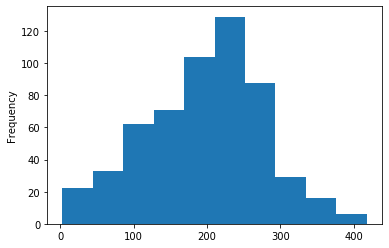

In [46]:
samp_s.plot(kind='hist')

In [47]:
b = cs2018_current_df['player_id'].value_counts()
b

11891    418
8327     407
8570     403
7266     386
7415     385
        ... 
5799       8
7          5
8349       4
7154       4
7980       3
Name: player_id, Length: 560, dtype: int64

In [48]:
players_140_matches = samp_s[samp_s >140]
# List of players between the 2018 and now with 140 or more matches
player140 = players_140_matches.index.tolist()
filtered_cs2018_current_df = cs2018_current_df[cs2018_current_df['player_id'].isin(player140)]

In [49]:
# Top 50 teams from 2018 to present time
top50_teams = team_s[team_s > 838]
top50_teams_list = top50_teams.index.tolist()
top50_teams_filtered_df = filtered_cs2018_current_df[filtered_cs2018_current_df['team'].isin(top50_teams_list)]

In [50]:


map_1_df = top50_teams_filtered_df[[
    'date',
    'player_name',
    'team',
    'opponent', 
    'player_id', 
    'match_id',
    'event_id',
    'best_of',
    'map_1',
    'm1_kills',
    'm1_assists',
    'm1_deaths',
    'm1_hs',
    'm1_flash_assists',
    'm1_kast',
    'm1_kddiff',
    'm1_adr',
    'm1_fkdiff',
    'm1_rating']].copy()
map_1_df

,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map_1,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating
2,2020-02-26,EliGE,Liquid,Evil Geniuses,8738,2339385,4901,3,Overpass,15,3,12,9,0.0,69.6,3,77.0,3,1.32
4,2020-02-26,NAF,Liquid,Evil Geniuses,8520,2339385,4901,3,Overpass,10,5,12,3,3.0,65.2,-2,51.5,0,0.83
5,2020-02-26,Stewie2K,Liquid,Evil Geniuses,8797,2339385,4901,3,Overpass,18,3,11,11,1.0,82.6,7,76.2,3,1.40
6,2020-02-26,Twistzz,Liquid,Evil Geniuses,10394,2339385,4901,3,Overpass,24,4,10,16,3.0,87.0,14,106.4,1,1.58
7,2020-02-26,nitr0,Liquid,Evil Geniuses,7687,2339385,4901,3,Overpass,15,4,12,7,3.0,78.3,3,69.0,2,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199276,2018-01-04,Furlan,AGO,eXtatus,8327,2318400,3365,3,Mirage,23,5,20,12,0.0,83.3,3,83.3,-1,1.19
199277,2018-01-04,GruBy,AGO,eXtatus,8570,2318400,3365,3,Mirage,20,6,22,6,1.0,76.7,-2,82.2,-2,1.07
199279,2018-01-04,TOAO,AGO,eXtatus,11278,2318400,3365,3,Mirage,20,8,22,10,2.0,70.0,-2,86.0,3,1.12
199282,2018-01-04,phr,AGO,eXtatus,11891,2318400,3365,3,Mirage,22,4,21,10,1.0,80.0,1,72.2,1,1.09


In [51]:


map_2_df = top50_teams_filtered_df[[
    'date',
    'player_name',
    'team',
    'opponent', 
    'player_id', 
    'match_id',
    'event_id',
    'best_of',
    'map_2',
    'm2_kills',
    'm2_assists',
    'm2_deaths',
    'm2_hs',
    'm2_flash_assists',
    'm2_kast',
    'm2_kddiff',
    'm2_adr',
    'm2_fkdiff',
    'm2_rating']].copy()
print(map_2_df.isna().sum())
map_2_df = map_2_df.dropna()
print(map_2_df.isna().sum())
map_2_df

date                    0
player_name             0
team                    0
opponent                0
player_id               0
match_id                0
event_id                0
best_of                 0
map_2               27921
m2_kills            27931
m2_assists          27931
m2_deaths           27931
m2_hs               27931
m2_flash_assists    30650
m2_kast             27931
m2_kddiff           27931
m2_adr              27931
m2_fkdiff           27931
m2_rating           27931
dtype: int64
date                0
player_name         0
team                0
opponent            0
player_id           0
match_id            0
event_id            0
best_of             0
map_2               0
m2_kills            0
m2_assists          0
m2_deaths           0
m2_hs               0
m2_flash_assists    0
m2_kast             0
m2_kddiff           0
m2_adr              0
m2_fkdiff           0
m2_rating           0
dtype: int64


,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map_2,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating
2,2020-02-26,EliGE,Liquid,Evil Geniuses,8738,2339385,4901,3,Nuke,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97
4,2020-02-26,NAF,Liquid,Evil Geniuses,8520,2339385,4901,3,Nuke,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35
5,2020-02-26,Stewie2K,Liquid,Evil Geniuses,8797,2339385,4901,3,Nuke,21.0,2.0,25.0,12.0,0.0,67.6,-4.0,60.1,-1.0,0.92
6,2020-02-26,Twistzz,Liquid,Evil Geniuses,10394,2339385,4901,3,Nuke,24.0,5.0,24.0,17.0,0.0,67.6,0.0,83.2,-2.0,1.08
7,2020-02-26,nitr0,Liquid,Evil Geniuses,7687,2339385,4901,3,Nuke,15.0,6.0,24.0,4.0,1.0,67.6,-9.0,53.0,-4.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199276,2018-01-04,Furlan,AGO,eXtatus,8327,2318400,3365,3,Train,23.0,6.0,15.0,10.0,3.0,77.8,8.0,80.7,1.0,1.32
199277,2018-01-04,GruBy,AGO,eXtatus,8570,2318400,3365,3,Train,17.0,8.0,18.0,5.0,3.0,70.4,-1.0,81.8,-1.0,1.02
199279,2018-01-04,TOAO,AGO,eXtatus,11278,2318400,3365,3,Train,19.0,0.0,14.0,9.0,0.0,59.3,5.0,57.2,1.0,1.00
199282,2018-01-04,phr,AGO,eXtatus,11891,2318400,3365,3,Train,21.0,7.0,19.0,13.0,0.0,77.8,2.0,88.7,-3.0,1.20


In [52]:
map_3_df = top50_teams_filtered_df[[
    'date',
    'player_name',
    'team',
    'opponent', 
    'player_id', 
    'match_id',
    'event_id',
    'best_of',
    'map_3',
    'm3_kills',
    'm3_assists',
    'm3_deaths',
    'm3_hs',
    'm3_flash_assists',
    'm3_kast',
    'm3_kddiff',
    'm3_adr',
    'm3_fkdiff',
    'm3_rating']].copy()
print(map_3_df.isna().sum())
map_3_df = map_3_df.dropna()
print(map_3_df.isna().sum())
map_3_df

date                    0
player_name             0
team                    0
opponent                0
player_id               0
match_id                0
event_id                0
best_of                 0
map_3               47155
m3_kills            47164
m3_assists          47164
m3_deaths           47164
m3_hs               47164
m3_flash_assists    48182
m3_kast             47164
m3_kddiff           47164
m3_adr              47164
m3_fkdiff           47164
m3_rating           47164
dtype: int64
date                0
player_name         0
team                0
opponent            0
player_id           0
match_id            0
event_id            0
best_of             0
map_3               0
m3_kills            0
m3_assists          0
m3_deaths           0
m3_hs               0
m3_flash_assists    0
m3_kast             0
m3_kddiff           0
m3_adr              0
m3_fkdiff           0
m3_rating           0
dtype: int64


,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map_3,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating
2,2020-02-26,EliGE,Liquid,Evil Geniuses,8738,2339385,4901,3,Inferno,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04
4,2020-02-26,NAF,Liquid,Evil Geniuses,8520,2339385,4901,3,Inferno,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98
5,2020-02-26,Stewie2K,Liquid,Evil Geniuses,8797,2339385,4901,3,Inferno,17.0,3.0,18.0,8.0,2.0,73.1,-1.0,68.4,-1.0,1.01
6,2020-02-26,Twistzz,Liquid,Evil Geniuses,10394,2339385,4901,3,Inferno,24.0,5.0,11.0,12.0,0.0,80.8,13.0,95.0,1.0,1.55
7,2020-02-26,nitr0,Liquid,Evil Geniuses,7687,2339385,4901,3,Inferno,20.0,5.0,16.0,6.0,2.0,76.9,4.0,75.7,6.0,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198906,2018-01-07,Edward,Natus Vincere,Space Soldiers,483,2318402,3359,3,Train,10.0,5.0,20.0,5.0,0.0,62.5,-10.0,64.2,-1.0,0.72
198909,2018-01-07,Zeus,Natus Vincere,Space Soldiers,484,2318402,3359,3,Train,15.0,5.0,15.0,4.0,0.0,79.2,0.0,67.1,-3.0,1.03
198910,2018-01-07,electronic,Natus Vincere,Space Soldiers,8918,2318402,3359,3,Train,22.0,3.0,14.0,12.0,0.0,83.3,8.0,93.4,2.0,1.35
198911,2018-01-07,flamie,Natus Vincere,Space Soldiers,7594,2318402,3359,3,Train,22.0,6.0,16.0,9.0,2.0,75.0,6.0,94.4,4.0,1.43


In [53]:
rename_column_headers = [
    'date',
    'player_name',
    'team',
    'opponent', 
    'player_id', 
    'match_id',
    'event_id',
    'best_of',
    'map',
    'kills',
    'assists',
    'deaths',
    'hs',
    'flash_assists',
    'kast',
    'kddiff',
    'adr',
    'fkdiff',
    'rating']

In [54]:
# Change column headers
map_1_df.columns = (rename_column_headers)
map_2_df.columns = (rename_column_headers)
map_3_df.columns = (rename_column_headers)

In [55]:
# Combine all three map dataframes
combined_map_df = pd.concat([map_1_df,map_2_df,map_3_df], ignore_index=True)
combined_map_df.sort_values(by=['match_id','map']).head(20)

,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating
59319,2018-01-04,Furlan,AGO,eXtatus,8327,2318400,3365,3,Mirage,23.0,5.0,20.0,12.0,0.0,83.3,3.0,83.3,-1.0,1.19
59320,2018-01-04,GruBy,AGO,eXtatus,8570,2318400,3365,3,Mirage,20.0,6.0,22.0,6.0,1.0,76.7,-2.0,82.2,-2.0,1.07
59321,2018-01-04,TOAO,AGO,eXtatus,11278,2318400,3365,3,Mirage,20.0,8.0,22.0,10.0,2.0,70.0,-2.0,86.0,3.0,1.12
59322,2018-01-04,phr,AGO,eXtatus,11891,2318400,3365,3,Mirage,22.0,4.0,21.0,10.0,1.0,80.0,1.0,72.2,1.0,1.09
59323,2018-01-04,snatchie,AGO,eXtatus,9574,2318400,3365,3,Mirage,25.0,3.0,22.0,7.0,1.0,60.0,3.0,83.0,1.0,1.11
87993,2018-01-04,Furlan,AGO,eXtatus,8327,2318400,3365,3,Train,23.0,6.0,15.0,10.0,3.0,77.8,8.0,80.7,1.0,1.32
87994,2018-01-04,GruBy,AGO,eXtatus,8570,2318400,3365,3,Train,17.0,8.0,18.0,5.0,3.0,70.4,-1.0,81.8,-1.0,1.02
87995,2018-01-04,TOAO,AGO,eXtatus,11278,2318400,3365,3,Train,19.0,0.0,14.0,9.0,0.0,59.3,5.0,57.2,1.0,1.00
87996,2018-01-04,phr,AGO,eXtatus,11891,2318400,3365,3,Train,21.0,7.0,19.0,13.0,0.0,77.8,2.0,88.7,-3.0,1.20
87997,2018-01-04,snatchie,AGO,eXtatus,9574,2318400,3365,3,Train,18.0,4.0,18.0,3.0,0.0,66.7,0.0,71.7,3.0,1.02


In [56]:
results_df.head(3)

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2


In [57]:
results_team_1_df = results_df[[
    'date',
    'team_1',
    '_map',
    'result_1',
    'map_winner',
    'starting_ct',
    'ct_1',
    't_1',
    'event_id',
    'match_id',
    'match_winner'
    ]].copy()
results_team_1_df

,date,team_1,_map,result_1,map_winner,starting_ct,ct_1,t_1,event_id,match_id,match_winner
0,2020-03-18,Recon 5,Dust2,0,2,2,0,0,5151,2340454,2
1,2020-03-18,Recon 5,Inferno,13,2,2,8,5,5151,2340454,2
2,2020-03-18,New England Whalers,Inferno,12,2,1,9,3,5243,2340461,2
3,2020-03-18,Rugratz,Inferno,7,2,2,0,7,5151,2340453,2
4,2020-03-18,Rugratz,Vertigo,8,2,2,4,4,5151,2340453,2
...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,G2,Inferno,13,2,1,8,5,1970,2299059,2
45769,2015-11-05,G2,Dust2,16,1,1,10,6,1970,2299059,2
45770,2015-11-04,CLG,Inferno,16,1,1,7,9,1934,2299011,1
45771,2015-11-03,NiP,Train,16,1,2,4,12,1934,2299001,1


In [58]:
# Change binary to str
results_team_1_df.loc[results_team_1_df.map_winner == 2, 'map_winner'] = 'L'
results_team_1_df.loc[results_team_1_df.map_winner == 1, 'map_winner'] = 'W'
results_team_1_df.loc[results_team_1_df.starting_ct == 2, 'starting_ct'] = 'No'
results_team_1_df.loc[results_team_1_df.starting_ct == 1, 'starting_ct'] = 'Yes'
results_team_1_df.loc[results_team_1_df.match_winner == 2, 'match_winner'] = 'No'
results_team_1_df.loc[results_team_1_df.match_winner == 1, 'match_winner'] = 'Yes'

In [59]:
results_team_1_df

,date,team_1,_map,result_1,map_winner,starting_ct,ct_1,t_1,event_id,match_id,match_winner
0,2020-03-18,Recon 5,Dust2,0,L,No,0,0,5151,2340454,No
1,2020-03-18,Recon 5,Inferno,13,L,No,8,5,5151,2340454,No
2,2020-03-18,New England Whalers,Inferno,12,L,Yes,9,3,5243,2340461,No
3,2020-03-18,Rugratz,Inferno,7,L,No,0,7,5151,2340453,No
4,2020-03-18,Rugratz,Vertigo,8,L,No,4,4,5151,2340453,No
...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,G2,Inferno,13,L,Yes,8,5,1970,2299059,No
45769,2015-11-05,G2,Dust2,16,W,Yes,10,6,1970,2299059,No
45770,2015-11-04,CLG,Inferno,16,W,Yes,7,9,1934,2299011,Yes
45771,2015-11-03,NiP,Train,16,W,No,4,12,1934,2299001,Yes


In [60]:
results_team_2_df = results_df[[
    'date',
    'team_2',
    '_map',
    'result_2',
    'map_winner',
    'starting_ct',
    'ct_2',
    't_2',
    'event_id',
    'match_id',
    'match_winner'
    ]].copy()
results_team_2_df

,date,team_2,_map,result_2,map_winner,starting_ct,ct_2,t_2,event_id,match_id,match_winner
0,2020-03-18,TeamOne,Dust2,16,2,2,15,1,5151,2340454,2
1,2020-03-18,TeamOne,Inferno,16,2,2,10,6,5151,2340454,2
2,2020-03-18,Station7,Inferno,16,2,1,10,6,5243,2340461,2
3,2020-03-18,Bad News Bears,Inferno,16,2,2,8,8,5151,2340453,2
4,2020-03-18,Bad News Bears,Vertigo,16,2,2,11,5,5151,2340453,2
...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,E-frag.net,Inferno,16,2,1,9,7,1970,2299059,2
45769,2015-11-05,E-frag.net,Dust2,13,1,1,8,5,1970,2299059,2
45770,2015-11-04,Liquid,Inferno,12,1,1,4,8,1934,2299011,1
45771,2015-11-03,Dignitas,Train,4,1,2,3,1,1934,2299001,1


In [61]:
# Change binary to str
results_team_2_df.loc[results_team_2_df.map_winner == 2, 'map_winner'] = 'W'
results_team_2_df.loc[results_team_2_df.map_winner == 1, 'map_winner'] = 'L'
results_team_2_df.loc[results_team_2_df.starting_ct == 2, 'starting_ct'] = 'Yes'
results_team_2_df.loc[results_team_2_df.starting_ct == 1, 'starting_ct'] = 'No'
results_team_2_df.loc[results_team_2_df.match_winner == 2, 'match_winner'] = 'Yes'
results_team_2_df.loc[results_team_2_df.match_winner == 1, 'match_winner'] = 'No'

In [62]:
results_team_2_df

,date,team_2,_map,result_2,map_winner,starting_ct,ct_2,t_2,event_id,match_id,match_winner
0,2020-03-18,TeamOne,Dust2,16,W,Yes,15,1,5151,2340454,Yes
1,2020-03-18,TeamOne,Inferno,16,W,Yes,10,6,5151,2340454,Yes
2,2020-03-18,Station7,Inferno,16,W,No,10,6,5243,2340461,Yes
3,2020-03-18,Bad News Bears,Inferno,16,W,Yes,8,8,5151,2340453,Yes
4,2020-03-18,Bad News Bears,Vertigo,16,W,Yes,11,5,5151,2340453,Yes
...,...,...,...,...,...,...,...,...,...,...,...
45768,2015-11-05,E-frag.net,Inferno,16,W,No,9,7,1970,2299059,Yes
45769,2015-11-05,E-frag.net,Dust2,13,L,No,8,5,1970,2299059,Yes
45770,2015-11-04,Liquid,Inferno,12,L,No,4,8,1934,2299011,No
45771,2015-11-03,Dignitas,Train,4,L,Yes,3,1,1934,2299001,No


In [63]:
results_team_column_headers = [
    'date',
    'team',
    'map',
    'result',
    'map_winner',
    'starting_ct',
    'ct',
    't',
    'event_id',
    'match_id',
    'match_winner'
    ]

In [64]:
# Renaming column headers
results_team_1_df.columns = (results_team_column_headers)
results_team_2_df.columns = (results_team_column_headers)

In [65]:
# Concat results for all teams
results_teams_df = pd.concat([results_team_1_df,results_team_2_df], ignore_index=True)

In [66]:
results_teams_df.loc[results_teams_df['match_id'] == 2339385]

,date,team,map,result,map_winner,starting_ct,ct,t,event_id,match_id,match_winner
748,2020-02-26,Liquid,Nuke,15,L,Yes,11,4,4901,2339385,Yes
750,2020-02-26,Liquid,Overpass,16,W,No,7,9,4901,2339385,Yes
755,2020-02-26,Liquid,Inferno,16,W,No,7,9,4901,2339385,Yes
46521,2020-02-26,Evil Geniuses,Nuke,19,W,No,11,4,4901,2339385,No
46523,2020-02-26,Evil Geniuses,Overpass,7,L,Yes,6,1,4901,2339385,No
46528,2020-02-26,Evil Geniuses,Inferno,10,L,Yes,6,4,4901,2339385,No


In [67]:
# Join results team dataframe with combined_map_df
player_map_results_df = pd.merge(combined_map_df, results_teams_df, on = ['match_id','team','map','date','event_id'])

In [68]:
player_map_results_df.to_csv(path + 'player_map_results.csv')

In [69]:
player_map_results_df

,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,result,map_winner,starting_ct,ct,t,match_winner
0,2020-02-26,EliGE,Liquid,Evil Geniuses,8738,2339385,4901,3,Overpass,15.0,3.0,12.0,9.0,0.0,69.6,3.0,77.0,3.0,1.32,16,W,No,7,9,Yes
1,2020-02-26,NAF,Liquid,Evil Geniuses,8520,2339385,4901,3,Overpass,10.0,5.0,12.0,3.0,3.0,65.2,-2.0,51.5,0.0,0.83,16,W,No,7,9,Yes
2,2020-02-26,Stewie2K,Liquid,Evil Geniuses,8797,2339385,4901,3,Overpass,18.0,3.0,11.0,11.0,1.0,82.6,7.0,76.2,3.0,1.40,16,W,No,7,9,Yes
3,2020-02-26,Twistzz,Liquid,Evil Geniuses,10394,2339385,4901,3,Overpass,24.0,4.0,10.0,16.0,3.0,87.0,14.0,106.4,1.0,1.58,16,W,No,7,9,Yes
4,2020-02-26,nitr0,Liquid,Evil Geniuses,7687,2339385,4901,3,Overpass,15.0,4.0,12.0,7.0,3.0,78.3,3.0,69.0,2.0,1.23,16,W,No,7,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93094,2018-01-07,Edward,Natus Vincere,Space Soldiers,483,2318402,3359,3,Train,10.0,5.0,20.0,5.0,0.0,62.5,-10.0,64.2,-1.0,0.72,16,W,Yes,8,8,Yes
93095,2018-01-07,Zeus,Natus Vincere,Space Soldiers,484,2318402,3359,3,Train,15.0,5.0,15.0,4.0,0.0,79.2,0.0,67.1,-3.0,1.03,16,W,Yes,8,8,Yes
93096,2018-01-07,electronic,Natus Vincere,Space Soldiers,8918,2318402,3359,3,Train,22.0,3.0,14.0,12.0,0.0,83.3,8.0,93.4,2.0,1.35,16,W,Yes,8,8,Yes
93097,2018-01-07,flamie,Natus Vincere,Space Soldiers,7594,2318402,3359,3,Train,22.0,6.0,16.0,9.0,2.0,75.0,6.0,94.4,4.0,1.43,16,W,Yes,8,8,Yes


In [70]:
economy_df

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,11_t1,12_t1,13_t1,14_t1,15_t1,16_t1,17_t1,18_t1,19_t1,20_t1,21_t1,22_t1,23_t1,24_t1,25_t1,26_t1,27_t1,28_t1,29_t1,30_t1,1_t2,2_t2,3_t2,4_t2,5_t2,6_t2,7_t2,8_t2,9_t2,10_t2,11_t2,12_t2,13_t2,14_t2,15_t2,16_t2,17_t2,18_t2,19_t2,20_t2,21_t2,22_t2,23_t2,24_t2,25_t2,26_t2,27_t2,28_t2,29_t2,30_t2,1_winner,2_winner,3_winner,4_winner,5_winner,6_winner,7_winner,8_winner,9_winner,10_winner,11_winner,12_winner,13_winner,14_winner,15_winner,16_winner,17_winner,18_winner,19_winner,20_winner,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,1100.0,22100.0,9350.0,25750.0,10400.0,24600.0,8150.0,26700.0,23400.0,4300.0,25900.0,11950.0,24850.0,21900.0,4150.0,10650.0,27300.0,27000.0,30950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.0,20250.0,24600.0,29300.0,30650.0,31450.0,32050.0,31450.0,32050.0,30950.0,29300.0,30200.0,31550.0,32350.0,33050.0,4250.0,20300.0,8250.0,1300.0,22200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,7400.0,23250.0,28500.0,31900.0,31700.0,18950.0,30200.0,28650.0,30350.0,30150.0,11100.0,23700.0,8550.0,26350.0,4050.0,9400.0,21900.0,12700.0,11300.0,3100.0,26250.0,21300.0,23950.0,27450.0,27550.0,28050.0,26250.0,26250.0,NaN,3500.0,18550.0,7300.0,1500.0,21800.0,12000.0,21050.0,24450.0,6850.0,26850.0,23100.0,25650.0,26800.0,26750.0,28250.0,4000.0,18850.0,15850.0,23000.0,26850.0,29100.0,26300.0,26850.0,19050.0,3500.0,26450.0,27450.0,27500.0,29050.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,14300.0,2000.0,24800.0,9000.0,23150.0,21850.0,23700.0,10450.0,26250.0,8800.0,24950.0,12100.0,24350.0,18250.0,4300.0,19400.0,8900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,21200.0,24150.0,27050.0,31350.0,30650.0,31050.0,28150.0,29650.0,30950.0,31550.0,32950.0,32250.0,31650.0,33350.0,4350.0,14300.0,22850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,18050.0,21000.0,25850.0,25000.0,25000.0,27250.0,26150.0,26300.0,27850.0,26750.0,27450.0,27850.0,18300.0,27850.0,4000.0,21100.0,9100.0,3100.0,22100.0,23350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.0,9300.0,2100.0,19300.0,27250.0,9850.0,24800.0,12200.0,27550.0,26100.0,7450.0,27650.0,24500.0,19100.0,18050.0,4150.0,15100.0,18450.0,23150.0,28150.0,27850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,10000.0,22000.0,24500.0,27550.0,29350.0,31950.0,31850.0,31750.0,32850.0,32150.0,31750.0,31850.0,33050.0,33150.0,4250.0,3000.0,21150.0,11750.0,28050.0,25900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,17950.0,9050.0,1000.0,22850.0,7500.0,24400.0,24700.0,9700.0,27150.0,21850.0,21900.0,8150.0,25200.0,20450.0,4300.0,19300.0,27400.0,31700.0,29650.0,12150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [71]:
combined_map_df

,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating
0,2020-02-26,EliGE,Liquid,Evil Geniuses,8738,2339385,4901,3,Overpass,15.0,3.0,12.0,9.0,0.0,69.6,3.0,77.0,3.0,1.32
1,2020-02-26,NAF,Liquid,Evil Geniuses,8520,2339385,4901,3,Overpass,10.0,5.0,12.0,3.0,3.0,65.2,-2.0,51.5,0.0,0.83
2,2020-02-26,Stewie2K,Liquid,Evil Geniuses,8797,2339385,4901,3,Overpass,18.0,3.0,11.0,11.0,1.0,82.6,7.0,76.2,3.0,1.40
3,2020-02-26,Twistzz,Liquid,Evil Geniuses,10394,2339385,4901,3,Overpass,24.0,4.0,10.0,16.0,3.0,87.0,14.0,106.4,1.0,1.58
4,2020-02-26,nitr0,Liquid,Evil Geniuses,7687,2339385,4901,3,Overpass,15.0,4.0,12.0,7.0,3.0,78.3,3.0,69.0,2.0,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99135,2018-01-07,Edward,Natus Vincere,Space Soldiers,483,2318402,3359,3,Train,10.0,5.0,20.0,5.0,0.0,62.5,-10.0,64.2,-1.0,0.72
99136,2018-01-07,Zeus,Natus Vincere,Space Soldiers,484,2318402,3359,3,Train,15.0,5.0,15.0,4.0,0.0,79.2,0.0,67.1,-3.0,1.03
99137,2018-01-07,electronic,Natus Vincere,Space Soldiers,8918,2318402,3359,3,Train,22.0,3.0,14.0,12.0,0.0,83.3,8.0,93.4,2.0,1.35
99138,2018-01-07,flamie,Natus Vincere,Space Soldiers,7594,2318402,3359,3,Train,22.0,6.0,16.0,9.0,2.0,75.0,6.0,94.4,4.0,1.43


In [72]:
top50_teams_filtered_df

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99
5,2020-02-26,Stewie2K,Liquid,Evil Geniuses,United States,8797,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,56,8,54,31,3.0,73.5,2,67.2,1,1.08,18,3,11,11,1.0,82.6,7,76.2,3,1.40,21.0,2.0,25.0,12.0,0.0,67.6,-4.0,60.1,-1.0,0.92,17.0,3.0,18.0,8.0,2.0,73.1,-1.0,68.4,-1.0,1.01,29.0,18.0,11.0,73.2,88.6,1.23,27.0,36.0,-9.0,62.8,62.5,0.97,8.0,3.0,5.0,83.4,100.0,1.51,10.0,8.0,2.0,72.4,73.3,1.34,13.0,9.0,4.0,73.8,87.5,1.19,8.0,16.0,-8.0,48.1,50.0,0.69,8.0,6.0,2.0,65.1,81.8,1.09,9.0,12.0,-3.0,70.8,66.7,0.95
6,2020-02-26,Twistzz,Liquid,Evil Geniuses,Canada,10394,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,72,14,45,45,3.0,77.1,27,93.3,0,1.36,24,4,10,16,3.0,87.0,14,106.4,1,1.58,24.0,5.0,24.0,17.0,0.0,67.6,0.0,83.2,-2.0,1.08,24.0,5.0,11.0,12.0,0.0,80.8,13.0,95.0,1.0,1.55,37.0,16.0,21.0,110.3,88.6,1.62,35.0,29.0,6.0,81.0,68.8,1.17,10.0,3.0,7.0,124.0,100.0,1.84,14.0,7.0,7.0,97.0,80.0,1.44,14.0,10.0,4.0,101.5,81.2,1.37,10.0,14.0,-4.0,66.9,55.6,0.82,13.0,3.0,10.0,113.0,90.9,1.84,11.0,8.0,3.0,81.9,73.3,1.33
7,2020-02-26,nitr0,Liquid,Evil Geniuses,United States,7687,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,50,15,52,17,6.0,73.5,-2,64.6,4,1.06,15,4,12,7,3.0,78.3,3,69.0,2,1.23,15.0,6.0,24.0,4.0,1.0,67.6,-9.0,53.0,-4.0,0.82,20.0,5.0,16.0,6.0,2.0,76.9,4.0,75.7,6.0,1.26,24.0,19.0,5.0,74.7,77.1,1.11,26.0,33.0,-7.0,57.2,70.8,1.03,4.0,5.0,-1.0,60.5,75.0,0.90,11.0,7.0,4.0,73.6,80.0,1.41,11.0,9.0,2.0,70.3,81.2,1.11,4.0,15.0,-11.0,37.7,55.6,0.56,9.0,5.0,4.0,91.4,72.7,1.27,11.0,11.0,0.0,64.1,80.0,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199276,2018-01-04,Furlan,AGO,eXtatus,Poland,8327,2318400,3365,ESEA MDL Season 

In [73]:
players_df

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,71.6,-5.0,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,63.1,0.0,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,43,5,54,18,2.0,65.1,-11,58.7,-4,0.83,11,1,15,6,1.0,65.2,-4,60.7,-2,0.73,22.0,3.0,21.0,8.0,1.0,70.6,1.0,67.9,-2.0,1.00,10.0,1.0,18.0,4.0,0.0,57.7,-8.0,45.0,0.0,0.69,33.0,23.0,10.0,74.0,75.0,1.11,10.0,31.0,-21.0,37.8,51.4,0.43,9.0,8.0,1.0,68.3,73.3,0.92,2.0,7.0,-5.0,46.5,50.0,0.38,15.0,6.0,9.0,84.3,83.3,1.40,7.0,15.0,-8.0,49.3,56.2,0.55,9.0,9.0,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383312,2015-10-07,kIMERA,ExAequo,RIP Fonty,Italy,7607,2298497,1957,Milan Games Week

In [74]:
players_df.query('player_id == "8327"')

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
424,2020-02-25,Furlan,AGO,HellRaisers,Poland,8327,2339777,5150,ESEA MDL Season 33 Europe,1,Mirage,NaN,NaN,21,5,19,15,0.0,69.0,2,80.1,-4,1.14,21,5,19,15,0.0,69.0,2,80.1,-4,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,9.0,5.0,91.6,66.7,1.25,7.0,10.0,-3.0,67.9,71.4,1.02,14.0,9.0,5.0,91.6,66.7,1.25,7.0,10.0,-3.0,67.9,71.4,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,2020-02-23,Furlan,AGO,Copenhagen Flames,Poland,8327,2339744,5223,OGA Counter PIT Season 7,3,Train,Nuke,Vertigo,48,28,47,22,5.0,77.9,1,81.1,0,1.14,17,4,12,7,2.0,87.5,5,77.7,2,1.27,12.0,9.0,21.0,7.0,3.0,62.1,-9.0,62.1,-2.0,0.76,19.0,15.0,14.0,8.0,0.0,87.5,5.0,107.6,0.0,1.50,27.0,24.0,3.0,77.7,77.8,1.08,21.0,23.0,-2.0,85.9,78.1,1.21,12.0,5.0,7.0,79.9,93.3,1.39,5.0,7.0,-2.0,73.9,77.8,1.08,7.0,10.0,-3.0,68.5,53.3,0.73,5.0,11.0,-6.0,55.2,71.4,0.79,8.0,9.0,-1.0,84.7,86.7,1.16,11.0,5.0,6.0,145.8,88.9,2.07
712,2020-02-23,Furlan,AGO,Gambit Youngsters,Poland,8327,2339743,5223,OGA Counter PIT Season 7,3,Train,Vertigo,Dust2,60,25,66,28,11.0,65.6,-6,77.2,-3,1.03,20,5,17,10,1.0,60.7,3,85.0,1,1.19,19.0,7.0,24.0,6.0,1.0,65.5,-5.0,79.1,0.0,0.94,21.0,13.0,25.0,12.0,9.0,69.4,-4.0,69.6,-4.0,0.97,38.0,30.0,8.0,95.4,74.5,1.23,22.0,36.0,-14.0,58.7,56.5,0.81,11.0,9.0,2.0,100.1,73.3,1.25,9.0,8.0,1.0,67.7,46.2,1.12,10.0,10.0,0.0,79.5,71.4,1.04,9.0,14.0,-5.0,78.8,60.0,0.86,17.0,11.0,6.0,103.8,77.8,1.37,4.0,14.0,-10.0,35.4,61.1,0.57
823,2020-02-22,Furlan,AGO,Copenhagen Flames,Poland,8327,2339729,5223,OGA Counter PIT Season 7,3,Nuke,Mirage,NaN,25,9,38,12,1.0,62.8,-13,77.5,-8,0.80,12,5,18,5,0.0,68.4,-6,82.1,-5,0.86,13.0,4.0,20.0,7.0,1.0,58.3,-7.0,73.8,-3.0,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,0.0,98.4,63.2,1.07,11.0,24.0,-13.0,60.9,62.5,0.58,4.0,3.0,1.0,118.8,50.0,1.47,8.0,15.0,-7.0,72.3,73.3,0.69,10.0,11.0,-1.0,92.9,66.7,0.97,3.0,9.0,-6.0,41.9,44.4,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,2020-02-20,Furlan,AGO,Nemiga,Poland,8327,2339685,5223,OGA Counter PIT Season 7,3,Mirage,Nuke,NaN,43,13,40,22,2.0,70.2,3,79.7,3,1.19,26,4,16,13,1.0,71.4,10,95.5,2,1.50,17.0,9.0,24.0,9.0,1.0,69.0,-7.0,64.5,1.0,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,19.0,3.0,89.7,74.1,1.15,21.0,21.0,0.0,70.8,66.7,1.22,9.0,8.0,1.0,72.1,69.2,0.94,17.0,8.0,9.0,115.7,73.3,1.98,13.0,11.0,2.0,106.0,78.6,1.34,4.0,13.0,-9.0,25.8,60.0,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382728,2015-10-11,Furlan,Poland,France,Poland,8327,2298554,1694,World Championships 2015,5,Train,Dust2,Cobblestone,72,12,68,40,NaN,NaN,4,NaN,3,1.0